# Lab Work : Digital signal processing
*Alexandre Coumes*
*Charles Angely*

In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

## Family of filters
### Butterworth

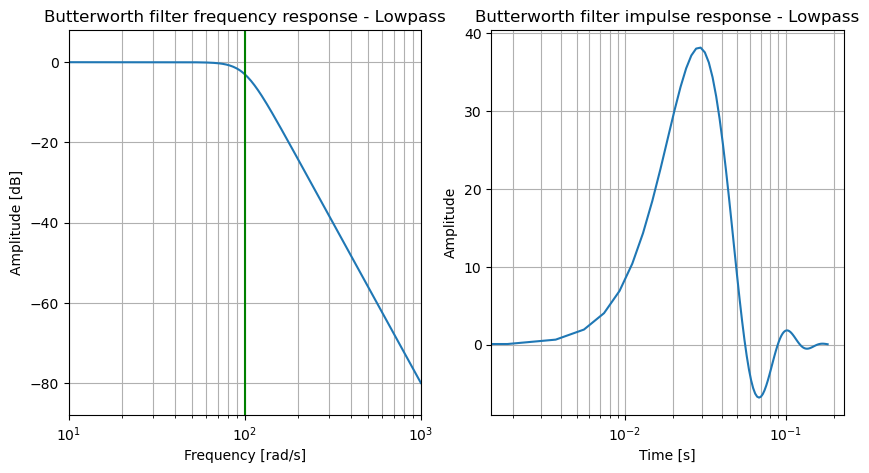

In [12]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
t, y = signal.impulse((b,a))

# ==== Plotting ====
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response - Lowpass')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
# Impulse response
plt.subplot(1,2,2)
plt.semilogx(t,y)
plt.title('Butterworth filter impulse response - Lowpass')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(which='both', axis='both')

Ici on construit un filtre dans le domaine fréquentiel.

### Chebychev

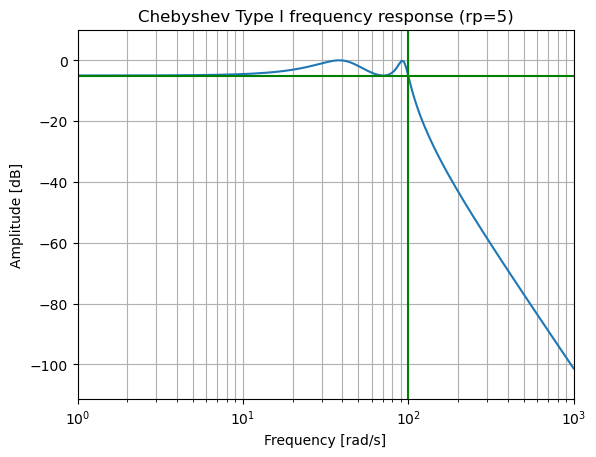

In [13]:
b, a = signal.cheby1(4, 5, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I frequency response (rp=5)')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()

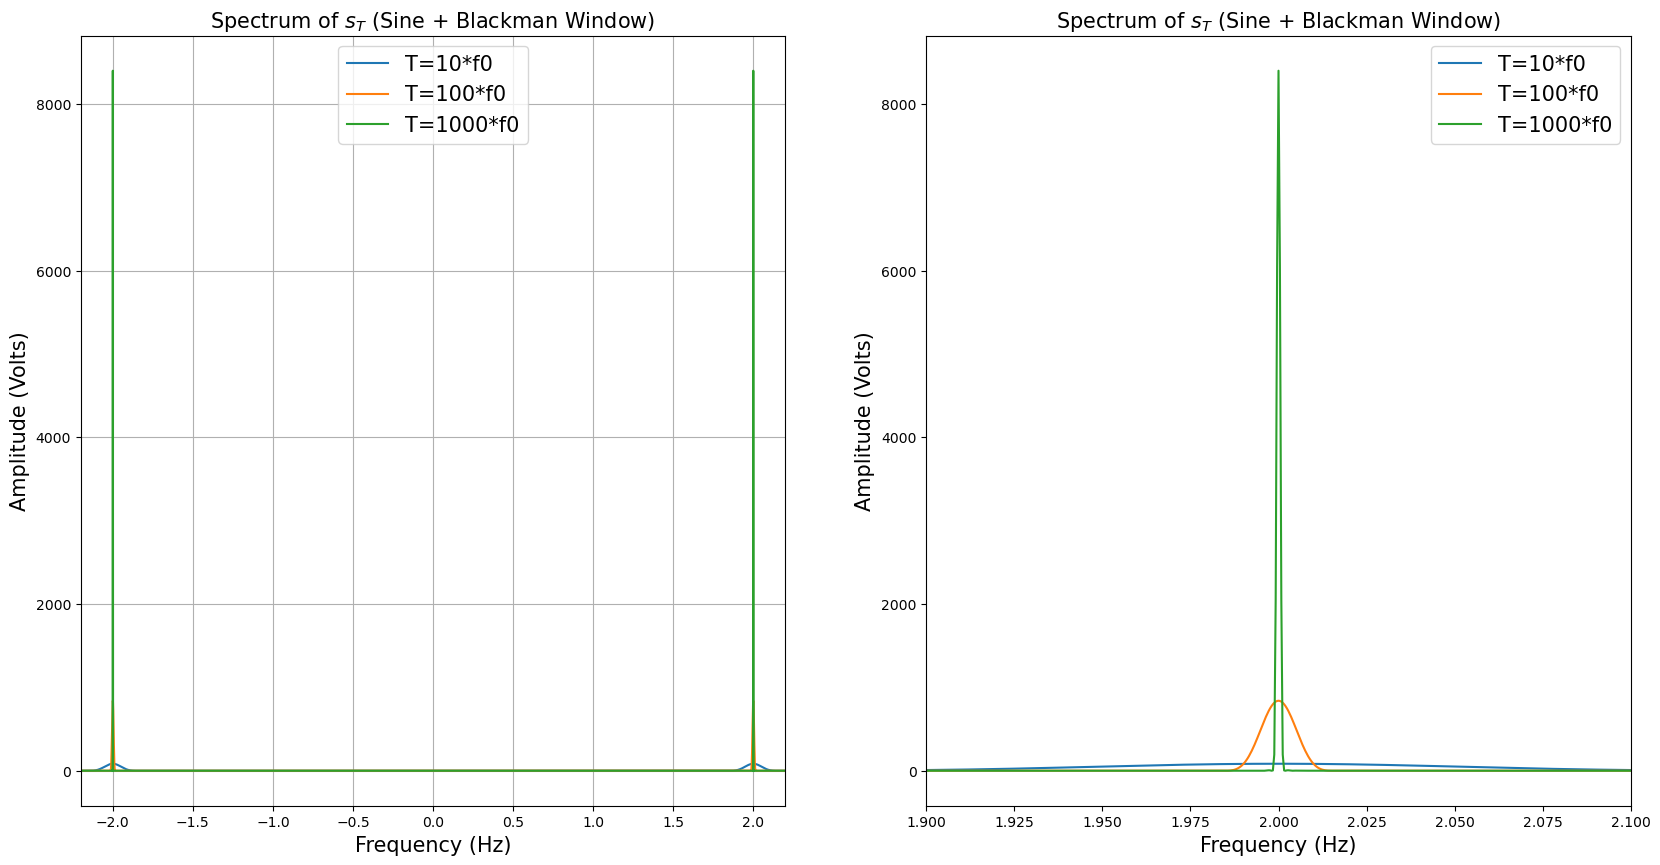

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftshift, fftfreq

A=[10,100,1000]
fig,ax=plt.subplots(1,2,figsize=(20, 10))
for a in A:
    # Paramètres
    f0 = 2.0        # Fréquence du sinus
    fs = 20.0       # Fréquence d'échantillonnage (élevée pour voir le spectre)
    T = a*f0        # Durée de la fenêtre
    N = int(T * fs) # Nombre de points

    # 1. Création du temps et du sinus
    t = np.linspace(-T/2, T/2, N, endpoint=False)
    sine = np.sin(2 * np.pi * f0 * t)

    # 2. Application de la fenêtre Pi_T (Rectangulaire)
    window = signal.windows.blackman(N)
    s_T = sine * window

    # 3. Analyse fréquentielle
    yf = fftshift(fft(s_T, n=50000)) # Padding pour une meilleure résolution
    xf = fftshift(fftfreq(50000, 1/fs))

    # Visualisation
    
    ax[0].plot(xf, np.abs(yf), label=f'T={a}*f0')
    ax[1].plot(xf, np.abs(yf), label=f'T={a}*f0')
ax[0].set_title(f"Spectrum of $s_T$ (Sine + Blackman Window)",fontsize=15)
ax[1].set_title(f"Spectrum of $s_T$ (Sine + Blackman Window)",fontsize=15)
ax[0].set_xlabel("Frequency (Hz)",fontsize=15)
ax[1].set_xlabel("Frequency (Hz)",fontsize=15)
ax[0].set_ylabel("Amplitude (Volts)",fontsize=15)
ax[1].set_ylabel("Amplitude (Volts)",fontsize=15)
ax[0].set_xlim(-2.2, 2.2) # Zoom sur la zone utile
ax[1].set_xlim(1.9, 2.1) # Zoom sur la zone utile
ax[0].grid()
ax[1].grid
ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)
plt.show()

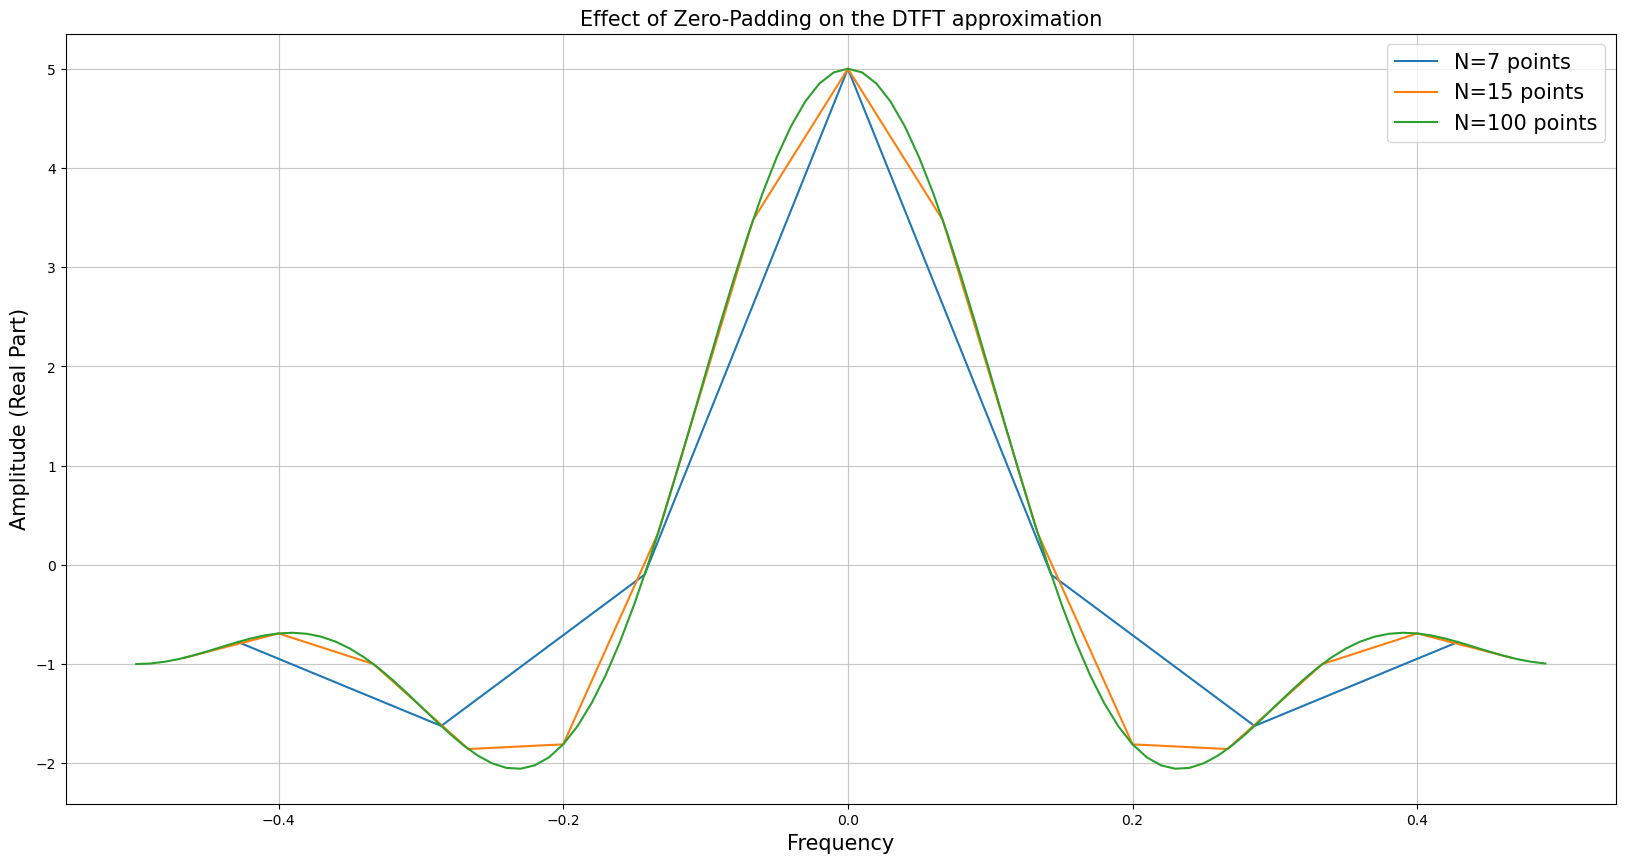

In [97]:
from scipy.fft import fft, fftfreq, fftshift
import numpy as np

#https://docs.scipy.org/doc/scipy/tutorial/fft.html#d-discrete-fourier-transforms
plt.figure(figsize=(20,10))

# Different size of paddings
N=[7,15,100]

for n in N :
    x = np.zeros(n)
    x[0]=0 #n=0
    x[1]=1 #n=1
    x[2]=1 #n=2
    x[3]=0.5 #n=3
    x[-1]=1 #n=-1
    x[-2]=1 #n=-2
    x[-3]=0.5 #n=-3
    # Compute the DTFT
    y = fft(x)
    # Move the second half of x vector to the front to have an ascending display
    xf= fftshift(fftfreq(len(x)))
    # Same with y vector
    yf=fftshift(y)
    # Plot only the real values (work the same whithout '.real' but there is warning message)
    plt.plot(xf,yf.real,label=f"N={n} points")
             
plt.title("Effect of Zero-Padding on the DTFT approximation", fontsize=15)
plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Amplitude (Real Part)", fontsize=15)

plt.legend(fontsize=15)
plt.grid(True, alpha=0.7)
plt.show()